In [49]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import catboost
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from itertools import combinations
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
pwd

'/Users/user/Library/CloudStorage/OneDrive-Nexus365/PhD/Campy_Analysis_ALL/Code/Non_r'

In [37]:
df = pd.read_csv(
    "../../Data/Singular_double_merged.txt",sep='\t',header = None,
    names=['Loci_combination','NG_assignment_Score'])

In [38]:
df['Loci_combination'] = df['Loci_combination'].apply(lambda x: tuple(x.split('-')))

In [39]:
df['n'] = df['Loci_combination'].apply(lambda x: len(x))

In [40]:
# Get all loci pairs
checkLoci = set(df.loc[df['n'] == 2, 'Loci_combination'].explode())
# Remove singles not in pairs (i.e. not top 100)
df = df.loc[df['Loci_combination'].apply(lambda x: set(x).issubset(checkLoci))]
# Make singles a pair (e.g. (CAMP0001,) -> (CAMP0001, CAMP0001)S)
df['Loci_combination'] = df['Loci_combination'].apply(
    lambda x: (x[0], x[0]) if len(x) == 1 else x)

In [41]:
df['Loci1'] = df['Loci_combination'].apply(lambda x: x[0])
df['Loci2'] = df['Loci_combination'].apply(lambda x: x[1])

In [42]:
cols = ['Loci_combination', 'NG_assignment_Score', 'n', 'Loci1', 'Loci2']
df2 = df.rename({'Loci1': 'Loci2', 'Loci2': 'Loci1'}, axis=1)[cols].copy()
df2 = df2.loc[df2['Loci1'] != df2['Loci2']]

In [43]:
df = pd.concat([df, df2]).reset_index(drop=True)

In [44]:
values = df.pivot(index = 'Loci1', columns = 'Loci2', values = 'NG_assignment_Score').astype(float)

In [45]:
order = pd.Series(np.diag(values), values.index).sort_values(ascending=False).index

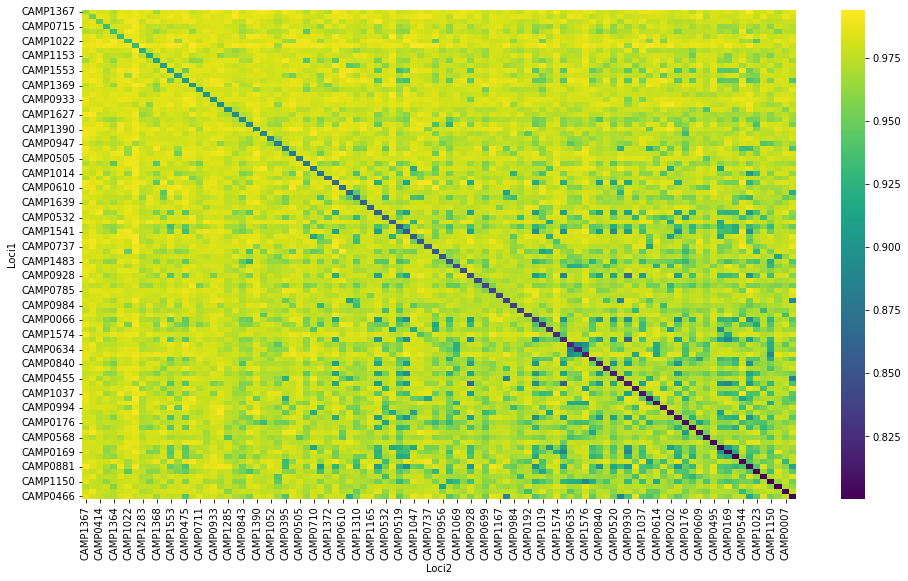

In [57]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(values.reindex(order)[order], cmap='viridis', ax=ax)

In [62]:
values.mean().sort_values(ascending=False)

Loci2
CAMP0932    0.985294
CAMP0308    0.982739
CAMP1367    0.982594
CAMP1138    0.981485
CAMP0933    0.981108
              ...   
CAMP0930    0.959211
CAMP0519    0.958871
CAMP0521    0.958618
CAMP0520    0.958136
CAMP0881    0.957719
Length: 100, dtype: float64